In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"../script_directory_output/youtube/prova_yt.csv")
df

,available,duration,title,description,views,likes,comments,channel,pubblication_date
0,True,10:30,"Rivelazione shock tg com24, virus cinese nato ...",NaN,29313,114,18,iLMeteo OFFICIAL,2020-01-25T15:46:06Z
1,True,5:23,"NEW YORK TIMES "" operatrice sanitaria in terap...",NaN,7646,982,217,Dario orgoglio Italiano,2020-12-17T08:31:12Z
2,True,34:40,Un Gigantesco Muro Luminoso ai Margini dell'un...,Cosa c'è ai margini della nostra galassia? C'è...,232793,3237,189,IL LATO POSITIVO,2022-01-16T11:30:21Z


In [6]:
import importlib

import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import sys
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
path_files = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/Files/"

# Obtain new Data

In [5]:
tweets = pd.read_parquet(path_files + "Tweets/tweets.parquet", engine="fastparquet")

In [6]:
# novax = pd.read_csv(path_files + "bad.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# novax = list(novax["screen_name"])

In [7]:
# novax_df = tweets[(tweets["user_screen_name"].isin(novax)) | (tweets["rt_user_screen_name"].isin(novax))]
# del tweets

In [10]:
# len(novax_df)

In [9]:
# novax_df.to_csv(path_files + "Tweets/novax_df.csv", line_terminator="\n", index=False, encoding="utf-8")

In [11]:
# novax_df = pd.read_csv(path_files + "Tweets/novax_df.csv", lineterminator="\n", low_memory=False, encoding="utf-8")

In [85]:
# np.mean(pd.Series(novax_df["user_screen_name"]).value_counts())

In [86]:
# louvain = pd.read_csv(path_files + "louvain.csv")
# louvain

In [87]:
# deg = pd.read_csv(path_files + "degree.csv")
# deg

In [88]:
# users_nt = deg.merge(louvain, left_on="user", right_on="name", how="left")[["user", "community", "degree"]]
# np.mean(users_nt[users_nt["user"].isin(list(set(novax_df["user_screen_name"])))]["degree"])

In [89]:
# setA = set(users_nt["user"])
# setB = set(novax_df["user_screen_name"])
# filtered = setA.difference(setB)
# filtered = list(filtered)
# filtered_df = users_nt[(users_nt["degree"]>=10) & (users_nt["user"].isin(filtered)) & (users_nt["community"]!=4)]

In [90]:
# names = random.choices(list(filtered_df["user"]), k=100)

In [91]:
# np.mean(filtered_df[filtered_df["user"].isin(names)]["degree"])

In [92]:
# filtered_df[filtered_df["user"].isin(names)]

In [93]:
# tweets = pd.read_parquet(path_files + "Tweets/tweets.parquet", engine="fastparquet")
# users_df = tweets[(tweets["user_screen_name"].isin(names)) | (tweets["rt_user_screen_name"].isin(names))]
# del tweets
# len(users_df)

In [94]:
# users_df.to_csv(path_files + "Tweets/users_df.csv", line_terminator="\n", index=False, encoding="utf-8")
# users_df

In [104]:
# users_df = pd.read_csv(path_files + "Tweets/users_df.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# other = pd.read_csv(path_files + "other_users.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# other = list(other["name"])

# Read data

In [3]:
novax = pd.read_csv(path_files + "bad.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
novax = list(novax["screen_name"])
novax_df = pd.read_csv(path_files + "Tweets/novax_df.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
novax_activities = novax_df[novax_df["user_screen_name"].isin(novax)]
users_df = pd.read_csv(path_files + "Tweets/users_df.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
other = pd.read_csv(path_files + "other_users.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
other = list(other["name"])
users_activities = users_df[users_df["user_screen_name"].isin(other)]

In [4]:
len(novax_df)

351154

# Activities

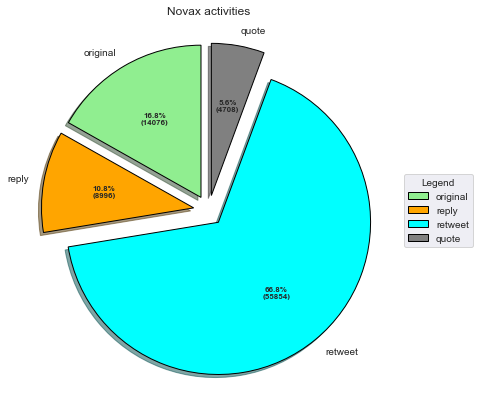

In [5]:
x = utils.split(novax_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Novax activities", labels, values)

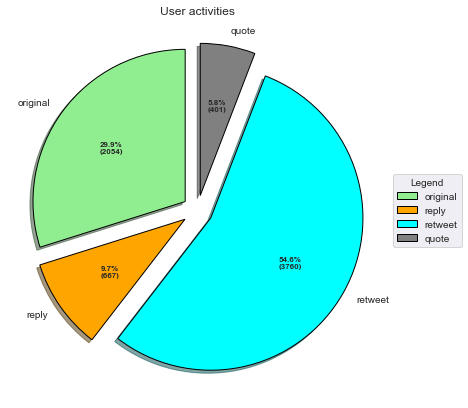

In [6]:
x = utils.split(users_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("User activities", labels, values)

# Hashtags

In [116]:
# import importlib
# importlib.reload(utils)

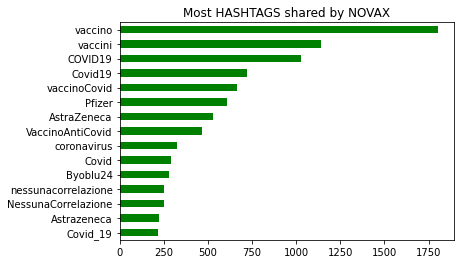

In [3]:
val = pd.Series(utils.hashtag_extraction(novax_activities)).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most HASHTAGS shared by NOVAX')
ax.invert_yaxis()
plt.show()

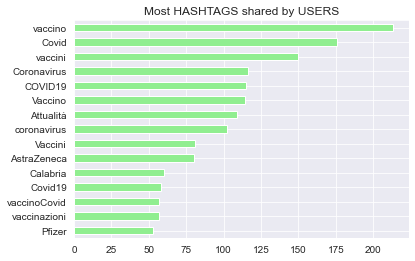

In [115]:
val = pd.Series(utils.hashtag_extraction(users_activities)).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='lightgreen')
ax.set_title('Most HASHTAGS shared by USERS')
ax.invert_yaxis()
plt.show()

# Urls

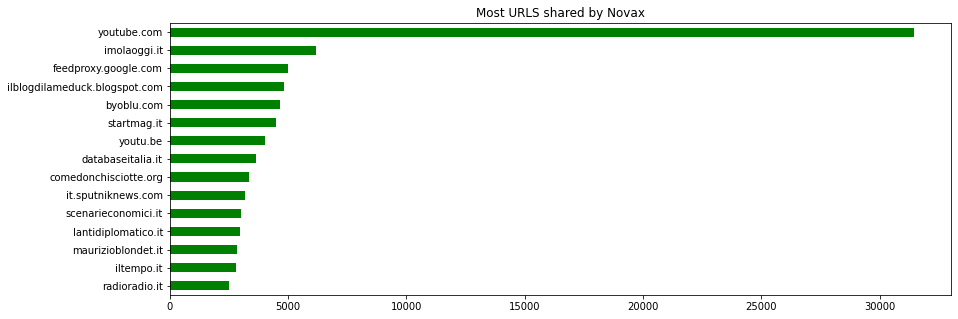

In [17]:
x = utils.extract_domain_list(novax_activities)
novax_urls = []
lst_not_plot = ["twitter.com", "bit.ly", "ow.ly"]
cont = 0
for i in x:
    if i != []:
        for j in i:
            if (j not in lst_not_plot):
                novax_urls.append(j)
val = pd.Series(novax_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most URLS shared by Novax')
ax.invert_yaxis()
plt.show()

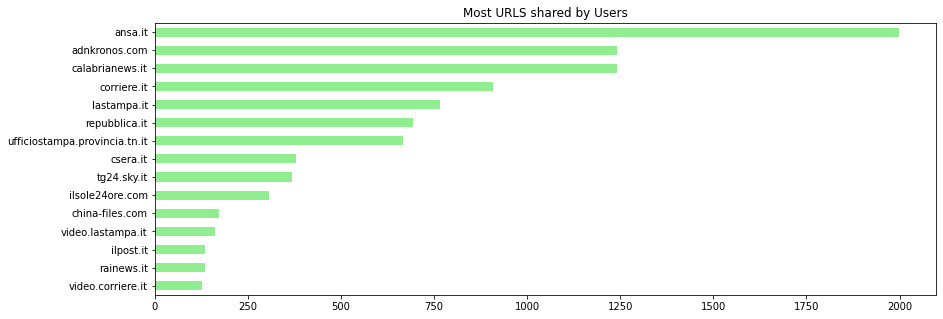

In [27]:
x = utils.extract_domain_list(users_activities)
users_urls = []
lst_not_plot = ["dlvr.it", "twitter.com", "tinyurl.com", "trib.al", "bit.ly", "ow.ly"]
cont = 0
for i in x:
    if i != []:
        for j in i:
            if j not in lst_not_plot:
                users_urls.append(j)
val = pd.Series(users_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='lightgreen')
ax.set_title('Most URLS shared by Users')
ax.invert_yaxis()
plt.show()

# YouTube

In [33]:
df_urls = novax_activities.loc[novax_activities['urls'] != '[]']
df_urls = [x.split()[3].translate({ord("'"): None}).replace(",","") for x in df_urls["urls"]]
df_urls = [x if ("https://youtu.be" in x) or ("https://www.youtube.com" in x) else np.nan for x in df_urls]
df_urls = list(pd.Series(df_urls).dropna())
len(df_urls)
df_yt_domains = pd.DataFrame(df_urls, columns=["URL"])

In [34]:
df_yt_domains.to_csv(r"C:\Users\gianl\Desktop\Gi\Supsi\BachelorProject\youtube_checker\data\novax_yt.csv", line_terminator="\n", index=False, encoding="utf-8")

In [35]:
############################ youtube

# SAGE

In [11]:
hs_sage = pd.read_csv(r"C:\Users\gianl\Desktop\Gi\Supsi\BachelorProject\sage\data\outfile.csv")
hs_sage

,source,word,sage,file_count,file_rate,base_count,base_rate
0,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,nessunacorrelazione,0.345397,539,0.021382,540,0.018473
1,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,byoblu24,0.340607,282,0.011187,282,0.009647
2,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,staseraitalia,0.319861,120,0.004760,120,0.004105
3,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,vaccinoassassino,0.319539,119,0.004721,119,0.004071
4,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,billgates,0.312654,148,0.005871,150,0.005131
5,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,covid19vaccines,0.302561,84,0.003332,84,0.002874
6,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,疫苗,0.295048,75,0.002975,75,0.002566
7,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,dittaturasanitaria,0.294819,91,0.003610,92,0.003147
8,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,vaccinationcovid,0.293060,73,0.002896,73,0.002497
9,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,コロナワクチン,0.293060,73,0.002896,73,0.002497


In [118]:
text_sage = pd.read_csv(r"C:\Users\gianl\Desktop\Gi\Supsi\BachelorProject\sage\data\outfile_text.csv")
text_sage

,source,word,sage,file_count,file_rate,base_count,base_rate
0,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,cavie,0.046210,6209,0.001046,6211,0.000982
1,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,tarro,0.045579,5000,0.000842,5000,0.000791
2,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,avverse,0.045389,7121,0.001199,7132,0.001128
3,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,sperimentali,0.044581,4193,0.000706,4193,0.000663
4,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,mantova,0.044570,4186,0.000705,4186,0.000662
5,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,nessunacorrelazione,0.043237,3628,0.000611,3629,0.000574
6,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,correlazione,0.042906,4586,0.000772,4595,0.000727
7,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,obbligatori,0.042800,3580,0.000603,3582,0.000566
8,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,libert,0.042777,7080,0.001193,7108,0.001124
9,C:\Users\gianl\Desktop\Gi\Supsi\BachelorProjec...,obbligo,0.042567,13978,0.002355,14060,0.002223


# News propagation

In [5]:
# tweets = pd.read_parquet(r"..\files\tweets\tweets.parquet", engine="fastparquet")
# tweets = tweets[["text", "urls","user_screen_name","created_at"]]
pd.Series(tweets["text"]).value_counts().sort_values(ascending=False)[15:25]
# http://ilblogdilameduck.blogspot.com/2020/12/il-totalitarismo-chimerico-e-la.html

Due parole di aggiornamento sulla sospensione del vaccino #astrazeneca. https://t.co/ch56x3ge9j                                                                                                                                                                                                        1250
Non criticate Conte perché ha chiesto aiuto a @Fedez e @ChiaraFerragni per promuovere l'uso della mascherina. Nel 1956 la copertura vaccinale USA contro la polio balzò dallo 0,5% a oltre l'80%. Uno dei motivi fu la vaccinazione in diretta televisiva di Elvis Presley, https://t.co/S0uIG1aQuF    1237
Medici e infermieri che non si vogliono vaccinare non possono stare al loro posto.                                                                                                                                                                                                                     1236
#Mattarella: Ora a tutti e ovunque, senza distinzioni, dovrà essere consentito di vaccinarsi gratuit

In [22]:
stringa = "#Tarro suggerisce il plasma: lo diffamano.\n#Dedonno lo usa e ottiene zero morti a #Mantova: gli mandano i NAS.\n#Conte tace sul plasma e supporta #BillGates.\n#Bergoglio prega per i vaccini.\nI virologi-tv chiedono segregazione fino ai vaccini.\nNon capite il nesso? Siete coglioni."
stringa_2 = "Tutti hanno diritto al vaccino indipendentemente dalla ricchezza del territorio in cui vivono.\nIn  Italia la salute è un bene pubblico fondamentale garantito dalla Costituzione. Non un privilegio di chi ha di più."
novax_fake = tweets[tweets["text"]==stringa]
provax_news = tweets[tweets["text"]==stringa_2]
dates = [utils.process_datetime(i) for i in list(novax_fake["created_at"])]
dates2 = [utils.process_datetime(i) for i in list(provax_news["created_at"])]
provax_news["date"] =dates2
novax_fake["date"] = dates
# novax_fake = novax_fake.sort_values(by=["date"], ascending=True)[["date","user_screen_name","rt_user_screen_name"]]
# novax_fake = novax_fake.dropna()

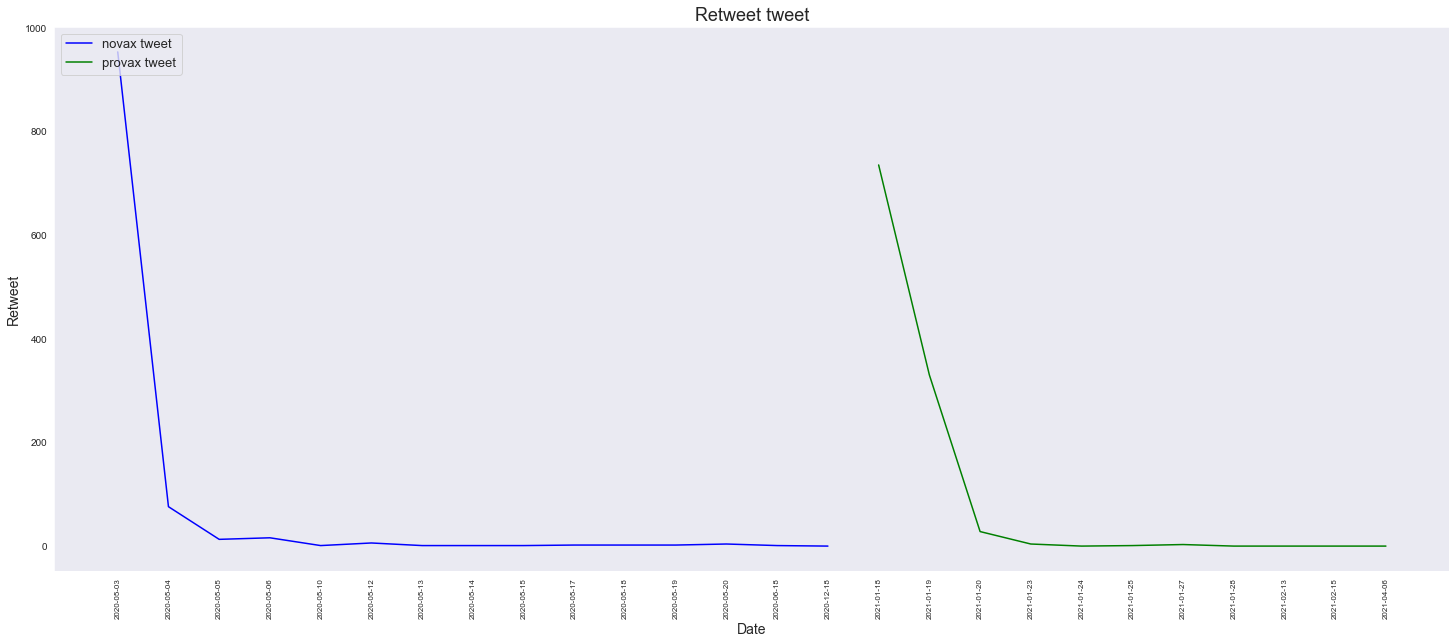

In [23]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(25, 10))
novax_fake['dates']= novax_fake.groupby(['date'])['created_at'].transform('size')
res_for_plot = novax_fake.drop_duplicates(subset='date')
res_for_plot.sort_values(by=["date"], ascending=True, inplace=True)
provax_news['dates']= provax_news.groupby(['date'])['created_at'].transform('size')
res_for_plot2 = provax_news.drop_duplicates(subset='date')
res_for_plot2.sort_values(by=["date"], ascending=True, inplace=True)
plt.title('Retweet tweet', fontsize=18)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Retweet', fontsize=14)

plt.plot(res_for_plot['date'], res_for_plot['dates'], c='b', label='novax tweet')
plt.plot(res_for_plot2['date'], res_for_plot2['dates'], c='g', label='provax tweet')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.xticks(rotation='vertical', fontsize = 8)
plt.legend(loc='upper left', fontsize=13)
plt.grid()
plt.show()

In [29]:
data = res_for_plot[["date","dates"]]
pos

['2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-10',
 '2020-05-12',
 '2020-05-13',
 '2020-05-14',
 '2020-05-15',
 '2020-05-17',
 '2020-05-18',
 '2020-05-19',
 '2020-05-20',
 '2020-06-18',
 '2020-12-18']

Text(0, 0.5, 'Female Births')

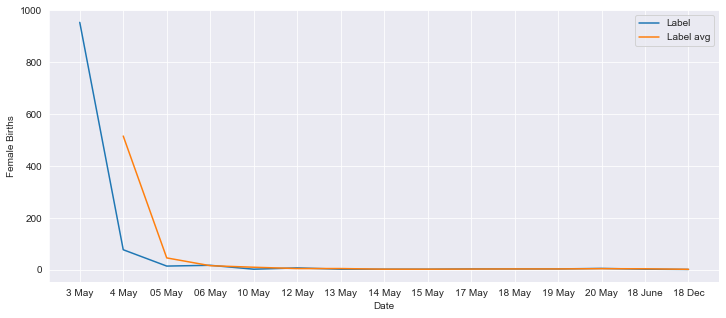

In [33]:
plt.figure(figsize = (12, 5))
import seaborn as sns
data['2day_rolling_avg'] = data.dates.rolling(2).mean()
sns.lineplot( x = 'date',
             y = 'dates',
             data = data,
             label = 'Label')
sns.lineplot( x = 'date',
             y = '2day_rolling_avg',
             data = data,
             label = 'Label avg')

plt.xlabel('Date')

# setting customized ticklabels for x axis
pos = list(data["date"])
lab = ['3 May','4 May',
 '05 May',
 '06 May',
 '10 May',
 '12 May',
 '13 May',
 '14 May',
 '15 May',
 '17 May',
 '18 May',
 '19 May',
 '20 May',
 '18 June',
 '18 Dec']

plt.xticks( pos, lab)

plt.ylabel('Female Births')

In [90]:
# names = list(novax_fake["user_screen_name"])
# names.extend(list(novax_fake["rt_user_screen_name"]))
# names = list(set(names))[1:]
# ids = [i for i in range(len(names))]
# df_users_fakenews = pd.DataFrame(list(zip(ids,names)), columns=["Id","Label"])
# df_users_fakenews.to_csv(r"../Files/gephi/names_fakenews.csv", line_terminator="\n", index=False,
#                          encoding="utf-8")

In [91]:
# merged = novax_fake.merge(df_users_fakenews, left_on="user_screen_name",
#                           right_on="Label", how="left")[["date","user_screen_name","rt_user_screen_name","Id"]]
# merged = merged.merge(df_users_fakenews, left_on="rt_user_screen_name",
#                           right_on="Label", how="left")[["date","user_screen_name","rt_user_screen_name","Id_x","Id_y"]]
# merged.rename(columns = {'user_screen_name':'From', 'rt_user_screen_name':'To',
#                          'Id_x':'Source', 'Id_y':'Target'}, inplace = True)
# merged.to_csv(r"../Files/gephi/archi_fakenews.csv", line_terminator="\n", index=False,
#                          encoding="utf-8")

In [7]:
# merged

In [8]:
# print(list(novax_fake["retweet_count"])[ccont])
# print(list(novax_fake["id"])[ccont])
# print(list(novax_fake["text"])[ccont])
# ccont += 1

In [9]:
# df = pd.DataFrame()
# for chunk in tqdm(pd.read_csv(path_files + "Tweets/tweets.csv", lineterminator="\n", low_memory=False, encoding="utf-8", chunksize=100000)):
#     chunk = chunk[chunk["text"]==novax_fake["text"][ccont]]
#     df = pd.concat([df,chunk], ignore_index=True)
# print(df)

In [10]:
# df.sort_values(by=["retweet_count"], ascending=False)[["created_at","retweet_count","user_screen_name"]]
# df_filtered = df.sort_values(by=["retweet_count"], ascending=False)[["id","created_at","retweet_count","user_screen_name","text"]]
# df_filtered = df_filtered.drop_duplicates(subset=["text"], keep="first")
# print(df_filtered)

In [11]:
# value += 1
# print(list(df_filtered["retweet_count"])[value])
# print(list(df_filtered["id"])[value])
# print(list(df_filtered["text"])[value])

# Most active Users

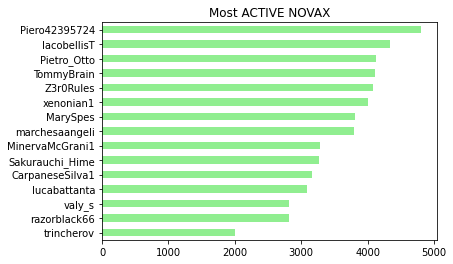

In [12]:
val = pd.Series(novax_activities["user_screen_name"]).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most ACTIVE NOVAX')
ax.invert_yaxis()
plt.show()

# Credibility

In [3]:
cred_user = pd.read_csv(r"../FIles/Tweets/result_cred_score_thresh_10.csv", lineterminator="\n")
cred_user

,Unnamed: 0,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
0,0,infoitinterno,17471,33,17267,171,0,1.0
1,1,Paolo90777,18,0,5,0,13,1.0
2,2,giuseppecarta73,17,0,1,15,1,1.0
3,3,ZiaGabriella1,11,0,7,3,1,1.0
4,4,lapillo1,36,0,3,1,32,1.0
...,...,...,...,...,...,...,...,...
9496,9496,traian_m,10,0,0,10,0,NaN
9497,9497,Osserv_Digital,10,0,0,10,0,NaN
9498,9498,ComuneOristano,10,0,0,10,0,NaN
9499,9499,fcin1908it,10,0,0,10,0,NaN


In [6]:
merge_novax = novax_activities.merge(cred_user, on="user_screen_name", how="left")
merge_users = users_activities.merge(cred_user, on="user_screen_name", how="left")

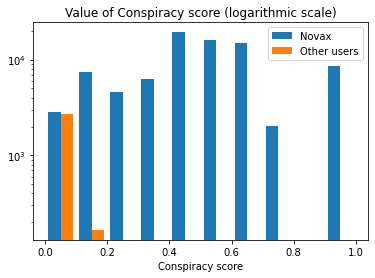

In [7]:
plt.hist([
          merge_novax["conspiracy_score"],
          merge_users["conspiracy_score"]],
          label=['Novax', 'Other users'])
plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()

In [10]:
louvain = pd.read_csv(path_files + "networks/louvain.csv")
merged_louvain = louvain.merge(cred_user, left_on="name", right_on="user_screen_name", how="left")
merged_louvain_right = merged_louvain[merged_louvain["community"]==4]
merged_louvain_left = merged_louvain[merged_louvain["community"]==0]
merged_louvain_influencer = merged_louvain[merged_louvain["community"]==2]
merged_louvain_paper = merged_louvain[merged_louvain["community"]==3]

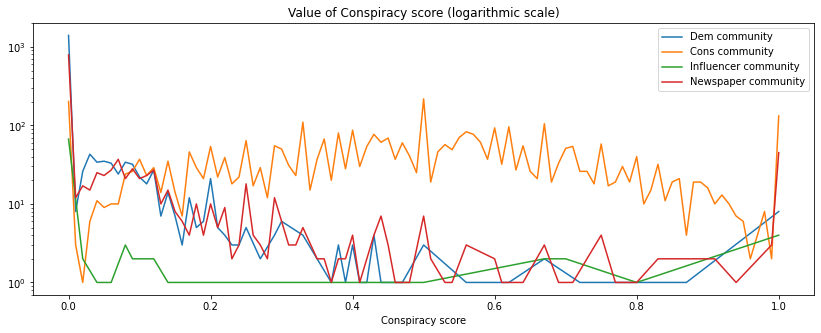

In [14]:
x = pd.Series(merged_louvain_paper["conspiracy_score"]).value_counts().sort_index(ascending=False)
x2 = pd.Series(merged_louvain_left["conspiracy_score"]).value_counts().sort_index(ascending=False)
x3 = pd.Series(merged_louvain_right["conspiracy_score"]).value_counts().sort_index(ascending=False)
x4 = pd.Series(merged_louvain_influencer["conspiracy_score"]).value_counts().sort_index(ascending=False)
plt.plot(list(x2.keys()), list(x2.values), label="Dem community")
plt.plot(list(x3.keys()), list(x3.values), label="Cons community")
plt.plot(list(x4.keys()), list(x4.values), label="Influencer community")
plt.plot(list(x.keys()), list(x.values), label="Newspaper community")
plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()

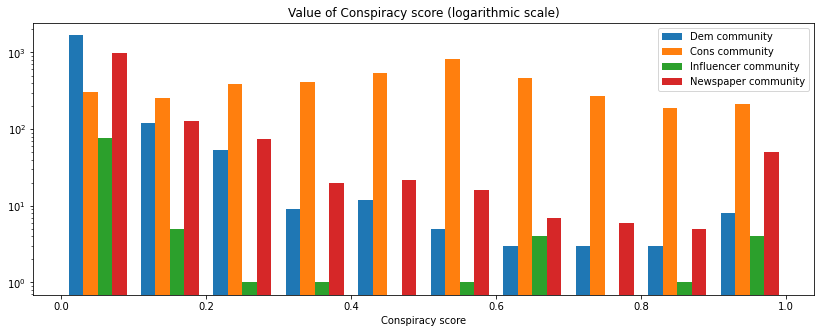

In [15]:
plt.hist([merged_louvain_left["conspiracy_score"],
          merged_louvain_right["conspiracy_score"],
          merged_louvain_influencer["conspiracy_score"],
          merged_louvain_paper["conspiracy_score"]],
          label=['Dem community', 'Cons community', "Influencer community", "Newspaper community"])
plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()